In [1]:
import cv2
import mediapipe as mp

# Initialize Mediapipe Hands
mp_hands = mp.solutions.hands

# Load the image (replace 'path_to_image.jpg' with the actual image path)
image_path = r"C:\Users\sayur\Downloads\hand1.jpg"
image = cv2.imread(image_path)

if image is None:
    print("Failed to load image. Check the file path.")
    exit()

# Convert the image to RGB (Mediapipe expects RGB format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize Mediapipe Hands with static_image_mode=True
hands = mp_hands.Hands(
    static_image_mode=True,        # Static image mode for single images
    max_num_hands=2,              # Detect up to 2 hands
    min_detection_confidence=0.5  # Minimum confidence for detection
)

# Process the image to detect hands
results = hands.process(image_rgb)

# If landmarks are detected
if results.multi_hand_landmarks:
    for hand_id, hand_landmarks in enumerate(results.multi_hand_landmarks):
        print(f"Hand {hand_id + 1}:")
        
        # Extract 2D coordinates for each landmark
        for landmark_id, lm in enumerate(hand_landmarks.landmark):
            h, w, _ = image.shape  # Get image dimensions
            x = int(lm.x * w)  # Convert normalized x to pixel x
            y = int(lm.y * h)  # Convert normalized y to pixel y
            print(f"  Landmark {landmark_id}: x={x}, y={y}")
else:
    print("No hands detected in the image.")

# Release resources
hands.close()


Hand 1:
  Landmark 0: x=99, y=175
  Landmark 1: x=72, y=159
  Landmark 2: x=57, y=134
  Landmark 3: x=48, y=110
  Landmark 4: x=35, y=97
  Landmark 5: x=78, y=115
  Landmark 6: x=73, y=74
  Landmark 7: x=70, y=51
  Landmark 8: x=69, y=34
  Landmark 9: x=98, y=114
  Landmark 10: x=97, y=72
  Landmark 11: x=95, y=46
  Landmark 12: x=93, y=28
  Landmark 13: x=116, y=119
  Landmark 14: x=118, y=81
  Landmark 15: x=118, y=56
  Landmark 16: x=117, y=38
  Landmark 17: x=132, y=127
  Landmark 18: x=140, y=99
  Landmark 19: x=144, y=82
  Landmark 20: x=147, y=67


In [ ]:
X Coordinates: [99, 72, 57, 48, 35, 78, 73, 70, 69, 98, 97, 95, 93, 116, 118, 118, 117, 132, 140, 144, 147]
Y Coordinates: [175, 159, 134, 110, 97, 115, 74, 51, 34, 114, 72, 46, 28, 119, 81, 56, 38, 127, 99, 82, 67]


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('mp_landmarks.csv')

In [3]:
df.iloc[0:300, :]['0_x'].isna().value_counts()

0_x
False    269
True      31
Name: count, dtype: int64

In [4]:
x = x = df.iloc[6, 1:22]
y = df.iloc[6, 22:]

In [6]:
y.values

array([109.,  88.,  83.,  94., 104., 103., 107., 109., 110., 117., 123.,
       125., 123., 128., 136., 137., 134., 140., 146., 147., 145.])

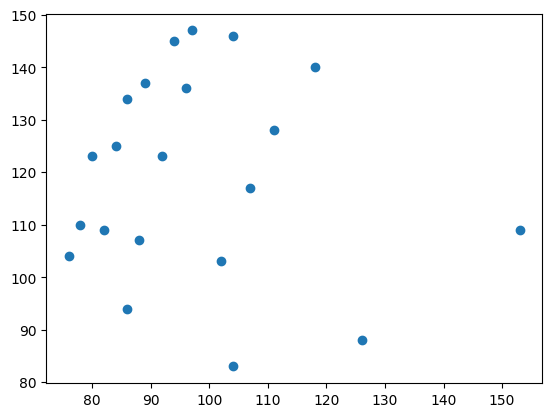

In [7]:
plt.scatter(x,y);

In [5]:
df[0:299][df['0_x'].isna() == True].index

C:\Users\sayur\AppData\Local\Temp\ipykernel_21796\126327187.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[0:299][df['0_x'].isna() == True].index


Index([  3,  26,  28,  38,  49,  78,  82,  87, 100, 102, 120, 126, 128, 133,
       145, 147, 153, 158, 161, 176, 180, 181, 189, 193, 198, 211, 223, 226,
       227, 271, 273],
      dtype='int64')

In [6]:
mp_failed = { 3,  26,  28,  38,  49,  78,  82,  87, 100, 102, 120, 126, 128, 133,
       145, 147, 153, 158, 161, 176, 180, 181, 189, 193, 198, 211, 223, 226,
       227, 271, 273}

op_failed = {1, 3, 4, 7, 11, 14, 15, 16, 17, 18, 20, 22, 23, 26, 27, 33, 34, 38, 40, 
             42, 44, 49, 50, 51, 54, 56, 57, 58, 60, 61, 62, 66, 67, 68, 71, 77, 78, 80,
             82, 84, 86, 87, 88, 89, 90, 91, 92, 93, 96, 97, 100, 101, 102, 103, 104, 106, 108, 111, 112, 113, 116,
             119, 120, 123, 126, 127, 130, 131, 133, 134, 137, 139, 141, 142, 144, 145, 147, 149, 150, 153, 158, 159, 
             161, 164, 171, 176, 180, 181, 182, 183, 184, 185, 187, 189, 191, 198, 201, 204, 207, 208, 209, 211, 213,
             216, 218, 220, 223, 224, 225, 226, 227, 228,
             230, 231, 237, 238, 241, 245, 247, 251, 252, 254, 255, 257, 258, 263, 266, 267, 269, 270, 271, 273, 279, 281, 
             282, 283, 286, 287, 288, 296, 298}

removing_indeces = list(mp_failed.union(op_failed))

In [7]:
print(removing_indeces)

[1, 3, 4, 7, 11, 14, 15, 16, 17, 18, 20, 22, 23, 26, 27, 28, 33, 34, 38, 40, 42, 44, 49, 50, 51, 54, 56, 57, 58, 60, 61, 62, 66, 67, 68, 71, 77, 78, 80, 82, 84, 86, 87, 88, 89, 90, 91, 92, 93, 96, 97, 100, 101, 102, 103, 104, 106, 108, 111, 112, 113, 116, 119, 120, 123, 126, 127, 128, 130, 131, 133, 134, 137, 139, 141, 142, 144, 145, 147, 149, 150, 153, 158, 159, 161, 164, 171, 176, 180, 181, 182, 183, 184, 185, 187, 189, 191, 193, 198, 201, 204, 207, 208, 209, 211, 213, 216, 218, 220, 223, 224, 225, 226, 227, 228, 230, 231, 237, 238, 241, 245, 247, 251, 252, 254, 255, 257, 258, 263, 266, 267, 269, 270, 271, 273, 279, 281, 282, 283, 286, 287, 288, 296, 298]


In [8]:
removing_indeces = [1, 3, 4, 7, 11, 14, 15, 16, 17, 18, 20, 22, 23, 26, 27, 28, 33, 34, 38, 40, 42, 44, 49, 50, 51, 54, 56, 57, 58, 60, 61, 62, 66, 67, 68, 71, 77, 78, 80, 82, 84, 86, 87, 88, 89, 90, 91, 92, 93, 96, 97, 100, 101, 102, 103, 104, 106, 108, 111, 112, 113, 116, 119, 120, 123, 126, 127, 128, 130, 131, 133, 134, 137, 139, 141, 142, 144, 145, 147, 149, 150, 153, 158, 159, 161, 164, 171, 176, 180, 181, 182, 183, 184, 185, 187, 189, 191, 193, 198, 201, 204, 207, 208, 209, 211, 213, 216, 218, 220, 223, 224, 225, 226, 227, 228, 230, 231, 237, 238, 241, 245, 247, 251, 252, 254, 255, 257, 258, 263, 266, 267, 269, 270, 271, 273, 279, 281, 282, 283, 286, 287, 288, 296, 298]
df = df.iloc[0:300]
df

,image,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y
0,0,71.0,74.0,81.0,88.0,91.0,106.0,122.0,133.0,143.0,...,124.0,126.0,131.0,135.0,138.0,141.0,138.0,143.0,145.0,147.0
1,1,118.0,100.0,91.0,92.0,96.0,90.0,87.0,88.0,89.0,...,75.0,66.0,104.0,83.0,73.0,65.0,100.0,84.0,77.0,70.0
2,2,82.0,75.0,78.0,82.0,78.0,96.0,107.0,114.0,120.0,...,89.0,79.0,133.0,118.0,108.0,99.0,145.0,135.0,130.0,124.0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,148.0,128.0,107.0,91.0,77.0,91.0,74.0,70.0,72.0,...,142.0,143.0,124.0,140.0,144.0,139.0,130.0,141.0,145.0,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,142.0,133.0,118.0,107.0,98.0,103.0,85.0,74.0,65.0,...,95.0,91.0,100.0,96.0,93.0,91.0,95.0,93.0,92.0,91.0
296,296,146.0,124.0,104.0,94.0,85.0,104.0,89.0,78.0,71.0,...,117.0,121.0,94.0,98.0,109.0,113.0,95.0,84.0,77.0,71.0
297,297,88.0,80.0,81.0,89.0,101.0,107.0,122.0,133.0,140.0,...,89.0,88.0,122.0,112.0,107.0,105.0,135.0,132.0,130.0,128.0
298,298,151.0,155.0,157.0,156.0,150.0,116.0,105.0,98.0,90.0,...,99.0,104.0,119.0,125.0,141.0,152.0,134.0,142.0,150.0,155.0


In [9]:
df = df.drop(index=removing_indeces)
df

,image,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y
0,0,71.0,74.0,81.0,88.0,91.0,106.0,122.0,133.0,143.0,...,124.0,126.0,131.0,135.0,138.0,141.0,138.0,143.0,145.0,147.0
2,2,82.0,75.0,78.0,82.0,78.0,96.0,107.0,114.0,120.0,...,89.0,79.0,133.0,118.0,108.0,99.0,145.0,135.0,130.0,124.0
5,5,151.0,151.0,137.0,123.0,116.0,108.0,91.0,82.0,77.0,...,101.0,96.0,124.0,122.0,115.0,108.0,138.0,140.0,135.0,127.0
6,6,153.0,126.0,104.0,86.0,76.0,102.0,88.0,82.0,78.0,...,125.0,123.0,128.0,136.0,137.0,134.0,140.0,146.0,147.0,145.0
8,8,142.0,133.0,116.0,99.0,84.0,111.0,91.0,78.0,67.0,...,106.0,113.0,112.0,113.0,119.0,124.0,118.0,120.0,124.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,293,150.0,143.0,119.0,96.0,80.0,132.0,115.0,101.0,88.0,...,108.0,108.0,96.0,93.0,91.0,89.0,92.0,83.0,77.0,72.0
294,294,151.0,152.0,146.0,135.0,123.0,113.0,98.0,89.0,81.0,...,106.0,111.0,121.0,119.0,122.0,126.0,133.0,138.0,143.0,148.0
295,295,142.0,133.0,118.0,107.0,98.0,103.0,85.0,74.0,65.0,...,95.0,91.0,100.0,96.0,93.0,91.0,95.0,93.0,92.0,91.0
297,297,88.0,80.0,81.0,89.0,101.0,107.0,122.0,133.0,140.0,...,89.0,88.0,122.0,112.0,107.0,105.0,135.0,132.0,130.0,128.0


In [10]:
df.to_csv('mp_benchmarking_dataset.csv', index=False)

#### Palm normalisation

In [37]:
import numpy as np

def palm_normalisation_for_x(x_landmark, x_wrist, y_wrist, x_m_mcp, y_m_mcp):
    rel = x_landmark - x_wrist
    palm_size = np.sqrt(((x_wrist - x_m_mcp)**2) + ((y_wrist - y_m_mcp)**2))
    return rel/palm_size

def palm_normalisation_for_y(y_landmark, x_wrist, y_wrist, x_m_mcp, y_m_mcp):
    rel = y_landmark - y_wrist
    palm_size = np.sqrt(((x_wrist - x_m_mcp)**2) + ((y_wrist - y_m_mcp)**2))
    return rel/palm_size
    
    

In [38]:
for i in range(len(df)):
    for j in range(1,22):
        df.iloc[i,j] = palm_normalisation_for_x(df.iloc[i,j], df.iloc[i,1], df.iloc[i,22], df.iloc[i,10], df.iloc[i,31])
    for k in range(22,43):
        df.iloc[i,k] = palm_normalisation_for_y(df.iloc[i,k], df.iloc[i,1], df.iloc[i,22], df.iloc[i,10], df.iloc[i,31])

In [39]:
df

,image,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20_y
0,0,0.0,0.672033,0.735604,0.799175,0.826419,0.962642,1.107947,1.207844,1.298659,...,87.727944,89.142911,92.680328,95.510262,97.632712,99.755162,97.632712,101.170129,102.585096,104.000063
2,2,0.0,0.669803,0.696595,0.732318,0.696595,0.857348,0.955586,1.018101,1.071685,...,64.346234,57.116320,96.157856,85.312985,78.083071,71.576148,104.833752,97.603838,93.988881,89.650933
5,5,0.0,1.463745,1.328033,1.192322,1.124466,1.046917,0.882124,0.794881,0.746413,...,72.170773,68.597963,88.605702,87.176578,82.174643,77.172708,98.609571,100.038696,96.465885,90.749388
6,6,0.0,1.174293,0.969257,0.801501,0.708303,0.950618,0.820141,0.764222,0.726943,...,88.513052,87.096844,90.637366,96.302201,97.010305,94.885992,99.134619,103.383245,104.091350,102.675141
8,8,0.0,1.206700,1.052460,0.898220,0.762126,1.007095,0.825637,0.707689,0.607886,...,75.712981,80.712895,79.998621,80.712895,84.998535,88.569902,84.284262,85.712809,88.569902,89.998449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,293,0.0,1.132640,0.942547,0.760374,0.633645,1.045514,0.910864,0.799976,0.697009,...,76.446033,76.446033,67.952029,65.828528,64.412861,62.997194,65.120695,58.750192,54.503190,50.964022
294,294,0.0,1.404041,1.348618,1.247010,1.136165,1.043794,0.905237,0.822103,0.748206,...,75.740908,79.313593,86.458961,85.029887,87.173498,90.031646,95.033404,98.606088,102.178772,105.751457
295,295,0.0,1.263861,1.121320,1.016791,0.931266,0.978780,0.807731,0.703201,0.617677,...,67.251015,64.419393,70.790542,67.958920,65.835204,64.419393,67.251015,65.835204,65.127298,64.419393
297,297,0.0,0.647821,0.655919,0.720701,0.817874,0.866461,0.987927,1.077003,1.133687,...,64.088288,63.368195,87.851362,80.650430,77.049965,75.609778,97.212572,95.052293,93.612107,92.171920


In [40]:
df.to_csv('mp_benchmarking_dataset.csv', index=False)